# 01 - Integers - Data Type

In 8 bits, the the number of combinations are $2^8=256$. The largest number you can represent is $256-1=255$ because you need to represent $0$.

If we care about handling negative numbers, we need 1 extra bit to represent the negative or positive sign, so we only have 7 bits, so the numbers we can represent are in the range $[-127, 127]$. **Not 1 extra bit for each number**: This is because we can have 8 bits to represent a number represented by XNNNNNNN, where the N bits will be used to represent the magnitude of the number and the X bit will be used to represent the sign; positive if X = 1 and negative if X = 0.

But, since there's no difference between $+0$ and $-0$, we don't need two different 8 bits to represent it, so we have one spare. This gets added to the negatives: $[-128, 127]$. 

The general formula is $[-2^{n-1},  2^{n-1} -1]$

On a 32-bit OS, our (unsigned) range is $[0, 2^32]$ = $[0, 4294967296]$. We have this many bytes avaliable as memory addresses. This equates to 4GB which means we can only have 4GB RAM on a 32-bit OS because we only have a limited amount of memory addresses to represent data with.

In [2]:
import sys
sys.getsizeof(0)

24

We see that we need 24 bytes (192 bits (ones or zeroes)) just to represent zero. That's because everything is an object in Python, so theres a memory overhead for creating that object. 24 bytes is therefore the minimum number of bytes (overhead) required to create this object. We can subtract 24 from any number of bytes used to find out how many bytes needed to store that number.

# 02 - Integers - Operations

Any number $a$ can be represented by n = b * (n // b) + n \% b  where $b$ can be any number whatsoever. It's an identity. This is infact how the modulo operator (%) is defined. It can be useful to think of $b$ as base.

In [3]:
100 == 26 * (100 // 26) + 100%26

True

# 03 - Integers - Constructors and Bases

We can convert numbers in base n (where $2 \le n \le 36$) to base 10 using

In [4]:
 f"100 in base 2 is {int('100', base = 2)} in base 10"

'100 in base 2 is 4 in base 10'

We can work backwards to convert a number from base 10 to another base using:

In [5]:
print(bin(20)) #bin == binary; the 0b prefix indicates that the number is in binary.
print(oct(35)) #0o means oct
print(hex(41)) #0x means hex

0b10100
0o43
0x29


We can use these as integer literal e.g.

In [6]:
a = 0b1010 #This is an integer and indicated as binary by 0b.
int(a)

10

To efficiently encode a list of digits with our own encoding map to a string, we can create the following function:

In [7]:
def encode(digits, digit_map):
    # we require that digit_map has at least as many
    # characters as the max number in digits
    if max(digits) >= len(digit_map):
        raise ValueError("digit_map is not long enough to encode digits")
    
    # we'll see this later, but the following would be better:
    encoding = ''.join([digit_map[d] for d in digits])
    return encoding

In [8]:
encode([1, 10, 11], '0123456789AB')

'1AB'

A list comprehension is far more efficient than doing

```
04 - Rational Numbersfor d in digits:
    encoding += map[d]
```

because strings are immutable, so we will create multiple strings in memory.

# 04 - Rational Numbers 

Float objects have finite precision; since we know that any real number that has a finite number of digits can be represented as a fraction, **all** floats can be represented as a fraction.
 
Some numbers have exact float representations while others do not.

In [9]:
from fractions import Fraction
Fraction(0.125)

Fraction(1, 8)

In [10]:
Fraction(0.3) # This is because 0.3 isn't exactly 0.3 when it's stored as a float.

Fraction(5404319552844595, 18014398509481984)

In [11]:
format(0.3, '.25f')

'0.2999999999999999888977698'

But we can constrain the denomator which finds the closest rational number

In [12]:
import math
x = Fraction(math.pi) # Returns Fraction(884279719003555, 281474976710656)
x.limit_denominator(10) #Denominator must not exceed 10.

Fraction(22, 7)

# 05 - Floats - Internal Representation 

Remember that when we looked at integers, we said that the number of memory space would grow to the extent of the size of the integer. Small integers take a few bytes while large numbers take many bites. 

Float are different - they use a **fixed** number of bytes. 

The amount of space (excluding overhead) is **8 bytes (64 bits)**
With overheard, it is generally **24 bytes** for any float.

The 64 bits are used up as follows:
- 1 bit : sign
- 11 bits : exponent ($[-2^{n-1}, 2^{n-1} -1] = [-1024, 1023]$, therefore max exponent is 1023: $e^{1023}$
- 52 bits : significant digits (like significant figures but for digits) e.g. 1234500000 has 5 significant digits and a value of 9 for the exponent.

We can represent a float (in base-10) as

123.456 = $(1*10^2)+(2*10^1)+(3*10^0)+(4*10^{-1})+(5*10^{-2})+(6*10^{-3})$

We can represent the same float in binary by the same method:

$(0.1101)_{2} = (1*2^{-1} + 1*2^{-2} + 0*2^{-3} + 1*2^{-4})_{10} = (0.8125)_{10} $

This explains why we can't represent some decimals cleanly in base 2.

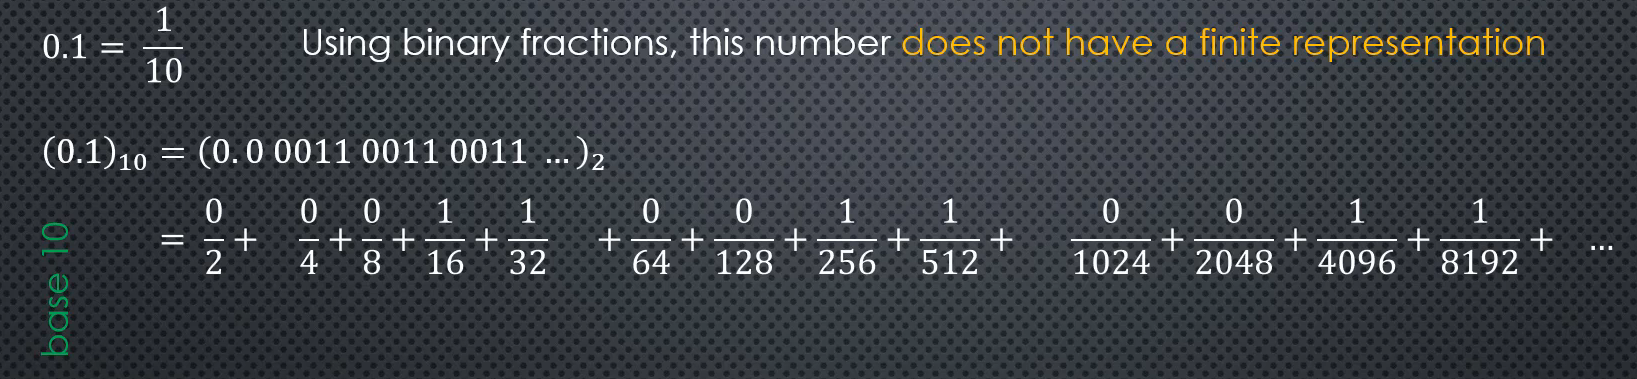

This is important because **this is how all numbers are stored in a computer; a computer only stores things in base 2**

# 06 - Floats - Equality Testing 

Because not all real numbers have an exact ``float`` representation, equality testing can be tricky.

In [13]:
x = 0.1 + 0.1 + 0.1 # format(x, '0.25f') => 0.3000000000000000444089210
y = 0.3 # format(y, '0.25f') => 0.2999999999999999888977698
x == y

False

We could use rounding but as we will see later, rounding doesn't do exactly what we want (Rounding only does an absolute tolerance check - not relative too). Instead, we should set up a tolerance for how far the numbers can be from each other.
It turns out that absolute tolerances are good in some circumstances and relative tolerances in others. So, the best way is to combine them by calculating both tolerances and using the larger of the two.

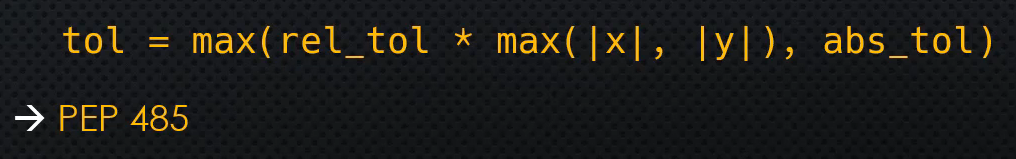

where relative tolerance is user-set e.g. 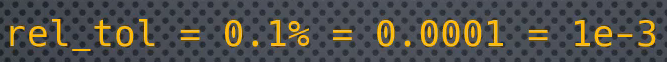


This entire method is inbuilt in `math` library under the `.isclose(a, b, rel_tot, abs_tot)` method.

# 07 - Floats - Coercing to Integers 

In all cases of converting a float to an integer, whether its by truncation, flooring, ceiling, or rounding, we will get data loss. All of these are in the math module.

truncation is identical to `int()`, floor and ceil are identical for positive numbers, but have caveats for negative numbers. Do e.g. `help(math.floor)` to find out the caveats.

# 08 - Floats - Rounding

With math.round, we round *away from zero* to the nearest $10^n$ where $n$ is a kwarg (n=0 is default). Here's some examples.

There are some weird caveats to rounding too. See 'Banker's Rounding for more details' (apparently regular rounding is biased to making numbers bigger).

In [14]:
print(round(18.67, 1))
print(round(18.6))
print(round(18.67, -1))

18.7
19
20.0


So if you really insist on rounding away from zero, there's really only one way. Methods like `int(x+0.5)` will work for positive numbers, but they don't for negative.

Mathematically, $\mathrm{roundedval} = \mathrm{int}(\mathrm{sign}(x)*x)+0.5 )$, where $\mathrm{sign}(x)$ is +1 for positive numbers and -1 for negative.

In [15]:
round(2.5) # To deal with these issues easily, use decimals module.

2

# 09 - Decimals

We need to use the **decimal** module to get around the infinite binary expansion that we get for decimal floats, e.g. 0.1. We want a way of avoding the approximation issues with floats.

In [16]:
import decimal
from decimal import Decimal

In [17]:
g_ctx = decimal.getcontext() # g_ctx = get context.
print(g_ctx)

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])


In [18]:
g_ctx.prec = 4
g_ctx.rounding = decimal.ROUND_HALF_UP
print(g_ctx)
g_ctx.prec = 28 # Setting back to default.
g_ctx.rounding = decimal.ROUND_HALF_EVEN 

Context(prec=4, rounding=ROUND_HALF_UP, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])


Notice how the types of getcontext and local context are different. Local context is a content manager which means we need to use a `with` statement. Once we exit out the `with` block, it gets disposed and we go back to the global context found in `getcontext`. 

But, it's important to note that calling `decimal.getcontext()` **within** the `with` statement will return the local context because we're within the `with` block.

So, more accurately, `get

In [19]:
print(type(decimal.localcontext()))
print(type(g_ctx))

<class 'decimal.ContextManager'>
<class 'decimal.Context'>


In [20]:
x = Decimal('1.25')
y = Decimal('1.35')

with decimal.localcontext() as ctx:
    ctx.rounding = decimal.ROUND_HALF_UP
    print('within local context: ', round(x, 1), round(y, 1))
    
print('within global context: ', round(x, 1), round(y, 1))

within local context:  1.3 1.4
within global context:  1.2 1.4


# 10 - Decimals - Constructors and Contexts 

we `import decimal` if we want to work with the context (e.g. `decimal.getcontext()`) as well as `from decimal import Decimal` if we want to work with the Decimal class.

We can pass many things into the Decimal class, but not usually floats because, as we've already seen, they don't have exact binary representations, so we will be passing an approximation of that float to the decimal class. Instead we use strings or tuples.

**Tuple constructor**: This creates an exact representation of the number with perfect precision. Once we start doing operations, then our precision will depend on the global/local context that we have set.

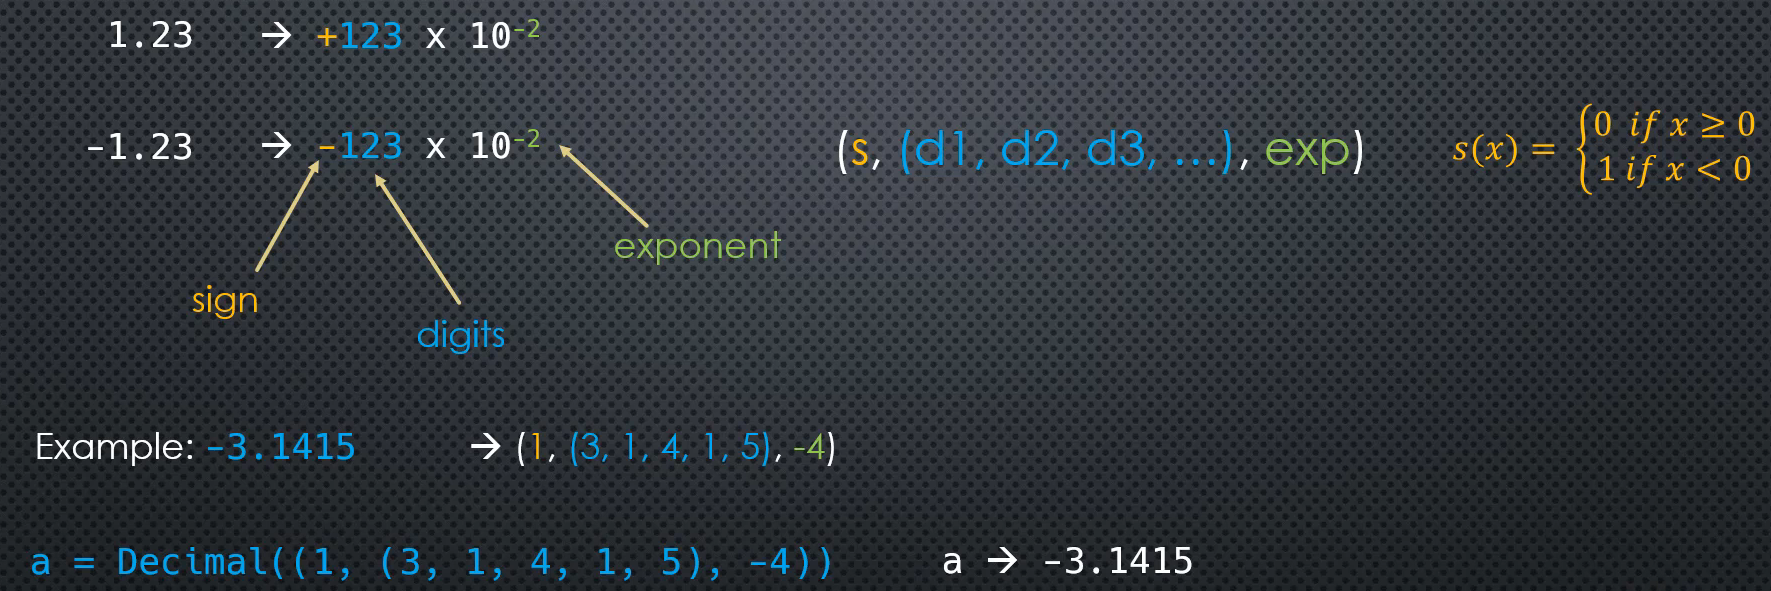

# 11 - Decimals - Math Operations

The // and % operators (and consequently, the divmod() function) behave differently for integers and Decimals.

This is because integer division for Decimals is performed differently, and results in a truncated division, whereas integers use a floored division.

These differences are only when negative numbers are involved. If all numbers involved are positive, then integer and Decimal div and mod operations are equal.

But in both cases the // and % operators satisfy the equation:

``n = d * (n // d) + (n % d)``

# 12 - Decimals - Performance Considerations

Creating Decimal objects takes much more memory, much longer to create and has slower performance than using floats (especially with the sqrt method in the `Decimal` class. It won't be significant unless you're making millions of calculations.

So, we only use `Decimal` if we really need that extra precision.

# 13 - Complex Numbers

# 14 - Booleans

The `bool` class is a subclas of the `int` class. Therefore, `bool` posses all the properties and methods of integers, and some much specialised ones such as `and`, `or`, etc. 

In [21]:
issubclass(bool, int)

True

`True` and `False` are singleton objects, so they always retain their same memory address throughout the lifetime of the application. This means that we can use `is` operator (in addition to the `==` operator).

Reminder: With singleton objects (e.g. `None`, interned strings), if we find create 5 variables (e.g a, b, c etc.) and their values gets set to True, then all 5 variables point to that one memory address. So `a is b` will return `True` because they both have the same memory address.

Important: while `True` can be interpreted as `1` (e.g. `int(True) -> 1`), they are **not** the same objects or even the same types. Therefore:

In [22]:
id(True) == id(1)

False

In [23]:
True is 1

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_4761/812578685.py:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  True is 1


False

The fact that we can write stuff like `True > False` and `True + True + True == 3` is due to polymorphism. This means that Python can understand what the context of the situation is, by looking at the surrounding operators for example, and using a type that's compatible with the operation. 

# 15 - Booleans - Truth Values

All objects have an associasted truth value, just like how `1`'s associated truth value is True while all other numbers' evaluate to False. This is known as **truthiness**.

There are some rules; every object has a True truth value, except:
- None
- False
- 0 in any numeric type (e.g. 0, 0.0 etc.)
- empty sequences (e.g. lists, tuples, strings)
- empty mapping sets (e.g. dictionaries, sets)
- custom classes that implement a dunder `__bool__` or `__len__` (if `__bool__` is not found) method that returns False or 0.

Remember that in general, typing `bool(x)` is telling Python to execute `x.__bool__()`  or `__len__` (if `__bool__` is not found). If neither is found, we default to `True`. 

The `__len__` is useful for sequences:

In [24]:
a = []
print(a.__len__())
bool(a) == (a.__len__()) # These two operands are exactly identical, Python literally calls a.__len__() which evaluates to 0 and bool(0) is False. Lists don't have a __bool__() method.

0


True

This is useful if we want to do some `if` loop on a list but only if the list exists and is not `None`. 

In [25]:
a = [1,2,3]
if a is not None and len(a) > 0:
    print('doing something')

else: 
    print('False')

doing something


The above is identical to the below because within `if` Python looks for a bool representation of `a` and finds it to be `True` because it has non-zero length.

In [26]:
if a:
    print('doing something')

else: 
    print('False')

doing something


# 16 - Booleans - Precedence and Short-Circuiting

Commutativity, distributivity and associativity are fairly intuitive for booleans, but one to note is:
    
**De Morgan's Theorem**

`not(A or B) == (not A) and (not B)` \
`not(A and B) == (not A) or (not B)`

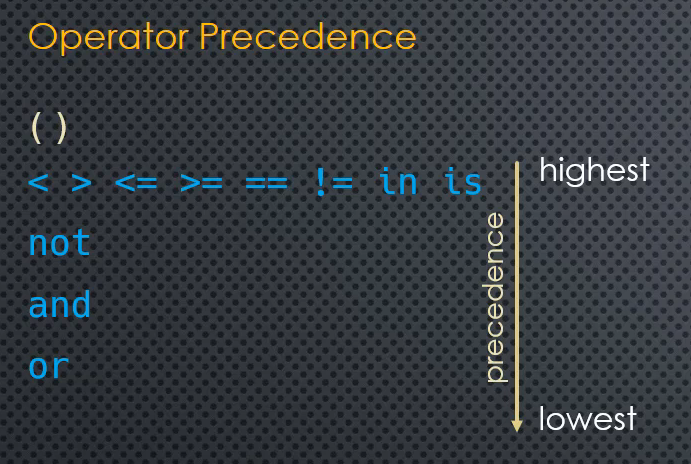

Short-circuiting is just that if you want to evaluate `X or Y` and you first evaluate `X` as `True`, then there's no point evaluating `Y` because we only need one of them to be `True` for `X or Y` to be `True`. \
We can do a similar thing with `and`.

In [27]:
import string
name  = ''
if name and name[0] in string.digits:
    print('name cant start with digit')

In [28]:
import string
name  = ''
if name and name[0] in string.digits:
    print('name cant start with digit')
    
else:
    print('name is fine')

name is fine


In the above, although `and` has a higher precedence than `in`, Python uses shortcircuiting so it evaluates left to right. \
It evaluates `name` (which does `name.__len()`) and **if necessary**, it evaluates the right side of `and`.

# 17 - Booleans - Boolean Operators 

Since all objects have **truthiness**, we can use boolean operators on them with no issues.\
But, an important question is: Is a boolean returned when evaluating an expression with boolean operators? **No**.

Definition of `or` in Python: \
**X or Y   ->   If X is truthy, return X, otherwise evalulate and return Y**

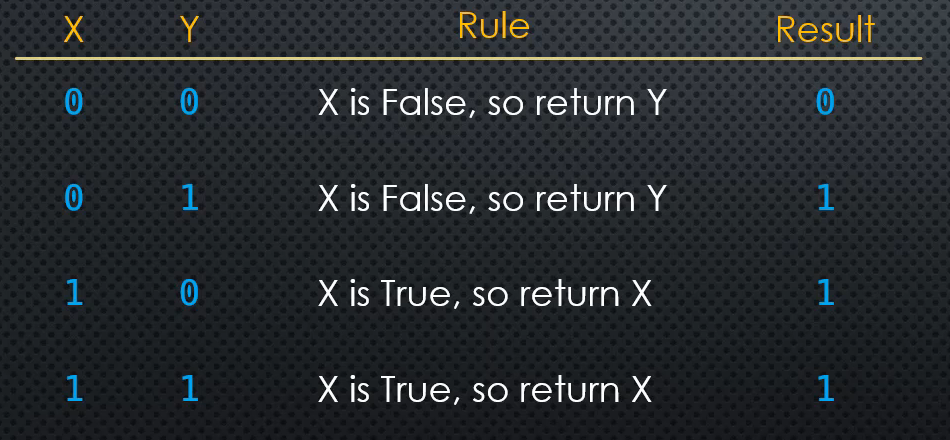

Look how following this definition results in the expected truth table values even though we don't even need to know what Y evaluates to as part of the logic; we just return it.

Definition of `and` in Python: \
**X and Y   ->   If X is falsy, return X, otherwise evalulate and return Y**

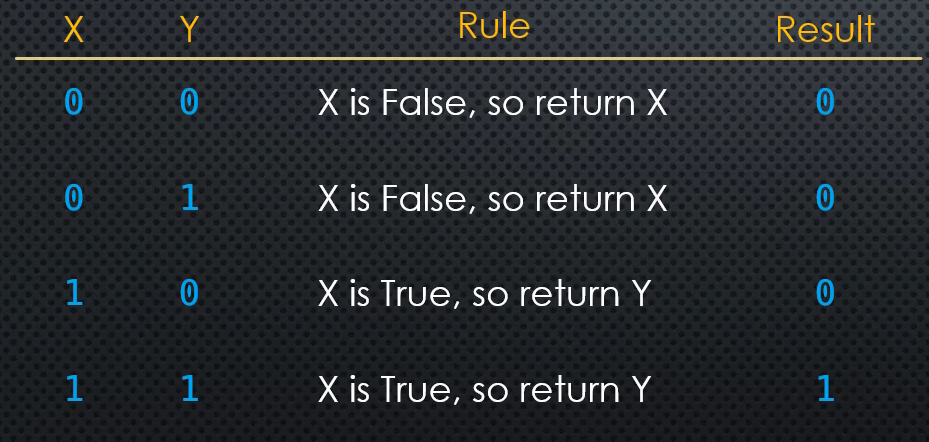

We can chain shortcircuiting like so:

In [29]:
s1 = None
s2 = ''
s3 = None

a = s1 or s2 or s3 or 'N/A'
print(a)

N/A


`a` will be equal to the **first truthy value** (left to right evaluation)

In this way, `a` is guaranteed to be a string because if all `s` variables fail, we will fallback on `'N/A'` because its guaranteed to be truthy since it has non-zero length.

This can be quite useful for avoiding an `if` loop. \
Let's say we want to compute an average but we're worried that sometimes we may have zero terms in the sum in which case we would need to take care in avoiding dividing by zero. This is the solution:

In [30]:
n = 0
sum = 338
avg = n and sum/n
print(avg)

0


In the above, we read from left to right and see if `n` is truthy. Since it is falsy, our definition of `and` says we **must** return the first operand, ignoring the second operand completely. \
If however, `n` is truthy, we must return the second operand, no matter what.

In [31]:
n = 13
sum = 338
avg = n and sum/n
print(avg)

26.0


Another example: Return first character of string, or an empty string if the string is None or empty.

In [32]:
s = None

def first_letter(string):
    if s:
        return s[0]
    else:
        return ''
    

first_letter(s)

''

Equivalently,

In [33]:
s = None

def first_letter(string):
    return (s and s[0]) or '' 

first_letter(s)

''

If s is falsy, we take it no matter what, so we're left with  `(False) or ''`.\
But if the first of this is falsy, we take the 2nd no matter what.

# 18 - Comparison Operators

It is possible to chain comparisons.

For example, in **a < b < c**, Python simply **ands** the pairwise comparisons: **a < b and b < c**

In [34]:
1 < 2 > -5 < 50 > 4

True